In [1]:
import pandas as pd

# Load CSV
file_path = "NetSol_Technologies_Stock.csv"  # Replace with your filename
df = pd.read_csv(file_path)

# dimensions
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

#column names
print("Columns:", df.columns.tolist())

df.head()


Rows: 740
Columns: 7
Columns: ['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']


,Date,Price,Open,High,Low,Vol.,Change %
0,06/02/2025,133.99,135.50,136.78,133.50,393.02K,-0.74%
1,05/30/2025,134.99,138.00,138.01,134.00,1.27M,-1.75%
2,05/29/2025,137.39,136.98,138.99,136.98,568.48K,1.25%
3,05/27/2025,135.69,136.00,137.48,135.10,427.75K,-0.65%
4,05/26/2025,136.58,138.01,138.39,136.00,286.23K,-1.28%


**Plotting Candlesticks**

In [2]:
import plotly.graph_objects as go

# Convert date column
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Create Candlestick chart
fig = go.Figure(data=[go.Candlestick(
    x=df['Date'],
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Price'],  # or 'Close' depending on your column
    name='NetSol'
)])

fig.update_layout(
    title='NetSol Technologies - Candlestick Chart',
    xaxis_title='Date',
    yaxis_title='Price (PKR)',
    xaxis_rangeslider_visible=False
)

fig.show()


**LSTM**

In [3]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# We'll use closing prices
data = df[['Date', 'Price']].copy()
data = data.set_index('Date')
data = data.sort_index()

# Scale the data
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)

# Create sequences
SEQ_LEN = 60
X, y = [], []
for i in range(SEQ_LEN, len(scaled)):
    X.append(scaled[i-SEQ_LEN:i])
    y.append(scaled[i])
X, y = np.array(X), np.array(y)

print("Input shape (X):", X.shape)
print("Target shape (y):", y.shape)


Input shape (X): (680, 60, 1)
Target shape (y): (680, 1)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(64, input_shape=(SEQ_LEN, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Reshape for LSTM
X = X.reshape((X.shape[0], SEQ_LEN, 1))

# Train
model.fit(X, y, epochs=30, batch_size=16, verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0901
Epoch 2/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0056
Epoch 3/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046
Epoch 4/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0044
Epoch 5/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0043
Epoch 6/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0037
Epoch 7/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0036
Epoch 8/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0029
Epoch 9/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0030
Epoch 10/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0027
Epoch 11/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0027
Epoch 12/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0027
Epoch 13/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0027
Epoch 14/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0024
Epoch 15/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0031
Epoch 16/30
43/43 ━

**Error Rate**

In [7]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math
from pandas.tseries.offsets import BDay
import pandas as pd
import matplotlib.pyplot as plt

#Predict on training data
y_pred = model.predict(X, verbose=0)
y_true_actual = scaler.inverse_transform(y.reshape(-1, 1))
y_pred_actual = scaler.inverse_transform(y_pred)

# Evaluate Model
mse = mean_squared_error(y_true_actual, y_pred_actual)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_true_actual, y_pred_actual)
r2 = r2_score(y_true_actual, y_pred_actual)

print("📉 Model Evaluation:")
print(f"• MSE  = {mse:.4f}")
print(f"• RMSE = {rmse:.4f}")
print(f"• MAE  = {mae:.4f}")
print(f"• R²   = {r2:.4f}")

📉 Model Evaluation:
• MSE  = 15.6795
• RMSE = 3.9597
• MAE  = 2.6890
• R²   = 0.9760


**Prediction on Future Specific dates**

In [8]:
# Forecast 300 future business days
last_sequence = scaled[-SEQ_LEN:]
future = []
n_future_days = 300

for _ in range(n_future_days):
    input_seq = last_sequence[-SEQ_LEN:].reshape(1, SEQ_LEN, 1)
    pred = model.predict(input_seq, verbose=0)
    future.append(pred[0][0])
    last_sequence = np.append(last_sequence, pred, axis=0)

# Inverse transform
future_prices = scaler.inverse_transform(np.array(future).reshape(-1, 1))

# Create future business dates
last_date = data.index[-1]
future_dates = [last_date + BDay(i+1) for i in range(n_future_days)]
future_df = pd.DataFrame({'Date': future_dates, 'Predicted Close': future_prices.flatten()})
future_df.set_index('Date', inplace=True)

#  Predict on Specific Future Dates
targets = ['2025-09-01', '2025-12-01', '2026-06-01']
predicted_prices = pd.DataFrame(columns=future_df.columns)


In [9]:
for target_date_str in targets:
    target_date = pd.to_datetime(target_date_str)
    if target_date in future_df.index:
        predicted_prices.loc[target_date] = future_df.loc[target_date]
    else:
        closest_idx = future_df.index.get_indexer([target_date], method='nearest')[0]
        closest_date = future_df.index[closest_idx]
        print(f"⚠️ Target date {target_date_str} not found. Using closest date: {closest_date.strftime('%Y-%m-%d')}")
        predicted_prices.loc[target_date] = future_df.loc[closest_date]

print("\n📈 Predicted Future Prices:")
print(predicted_prices)


📈 Predicted Future Prices:
            Predicted Close
2025-09-01       121.687935
2025-12-01       115.336990
2026-06-01       108.775185


**Prediction on Investment**

In [11]:
# Investment Simulation
start_date_str = '2025-06-01'
start_date = pd.to_datetime(start_date_str)

if start_date in future_df.index:
    start_price = future_df.loc[start_date, 'Predicted Close']
else:
    closest_idx = future_df.index.get_indexer([start_date], method='nearest')[0]
    closest_start_date = future_df.index[closest_idx]
    print(f" Start date {start_date_str} not found. Using closest date: {closest_start_date.strftime('%Y-%m-%d')}")
    start_price = future_df.loc[closest_start_date, 'Predicted Close']

investment = 10000  # PKR
shares_bought = investment / start_price

print(f"\n If you invest {investment} PKR on {start_date_str}:")
for date in predicted_prices.index:
    future_price = predicted_prices.loc[date, 'Predicted Close']
    value = shares_bought * future_price
    print(f"On {date.strftime('%Y-%m-%d')}, investment is worth: {value:.2f} PKR")

 Start date 2025-06-01 not found. Using closest date: 2025-06-03

 If you invest 10000 PKR on 2025-06-01:
On 2025-09-01, investment is worth: 9077.10 PKR
On 2025-12-01, investment is worth: 8603.37 PKR
On 2026-06-01, investment is worth: 8113.90 PKR


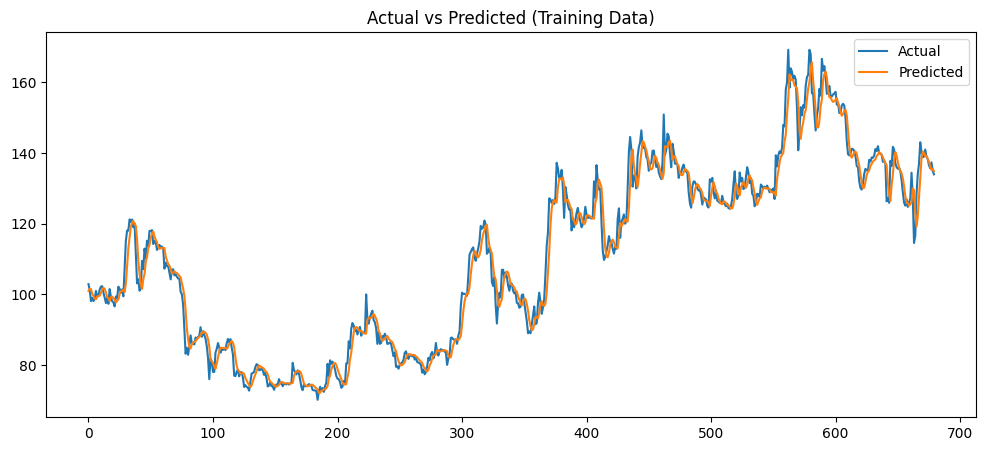

In [12]:
plt.figure(figsize=(12, 5))
plt.plot(y_true_actual, label='Actual')
plt.plot(y_pred_actual, label='Predicted')
plt.title('Actual vs Predicted (Training Data)')
plt.legend()
plt.show()